# Laboratory 6

## Exercise 1
The number of particles emitted by a radioactive source during a fixed interval of time ($\Delta t = 10\text{s}$) follows a Poisson distribution on the parameter µ. The number of particles observed during consecutive time intervals is: $4, 1, 3, 1$ and $3$.

In [56]:
data = c(4,1,3,1,3)

### a) Suppose a uniform prior distribution for the parameter $\mu$ 
- determine and draw the posterior distribution for $\mu$, given the data
- evaluate mean, median and variance, both analytically and numerically in R

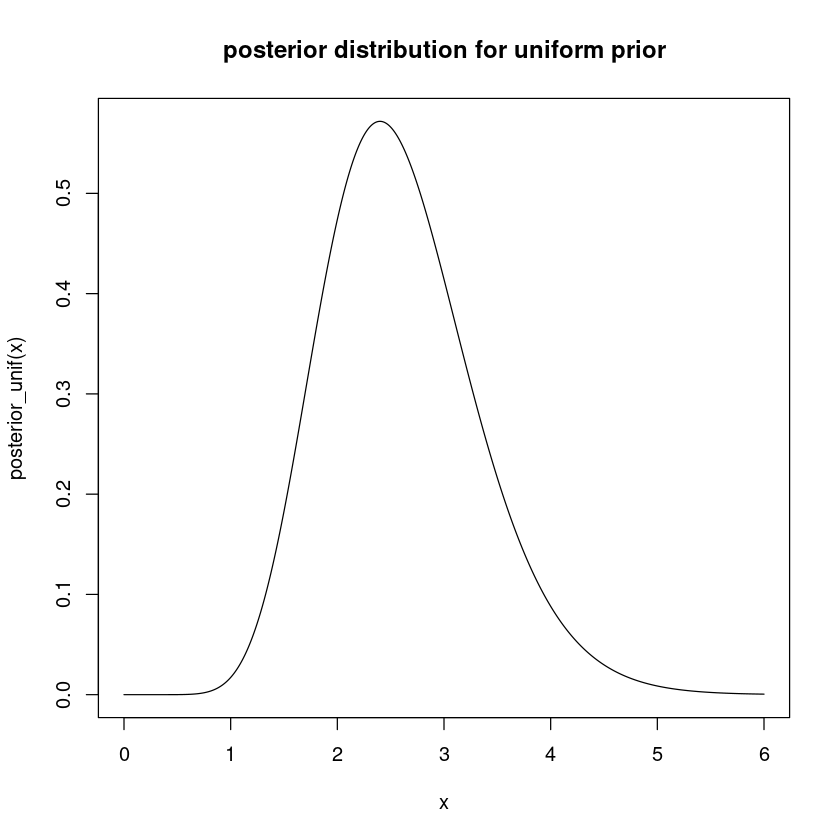

In [57]:
#normalized <- function(f,a,b){
#    c <- integrate(f,a,b)$value
#    n_f <- function(x){f(x)/c}
#    return(n_f)
#}
#prior <- function(x){1}
x <- seq(0,6,0.01)
# The product of poisson distributions becomes a gamma function:
#likelihood <- function(data,mu){dgamma(mu,sum(data)+1,length(data))}
alpha <- sum(data)+1; lambda <- length(data)
posterior_unif <- function(mu){dgamma(mu,alpha,lambda)}
plot(x,posterior_unif(x), type = 'l', main = 'posterior distribution for uniform prior')

In [58]:
sampli <- rgamma(10000,alpha,1/lambda)
unif_avg_emp <- mean(sampli)
unif_var_emp <- mean(sampli**2)-unif_avg_emp**2
unif_avg_theo <- alpha/lambda
unif_var_theo <- alpha/lambda**2

### b) Suppose a Jeffreys prior for the parameter µ
 - determine and draw the posterior distribution for $\mu$, given the data
 - evaluate mean, median and variance, both analytically and numerically in R

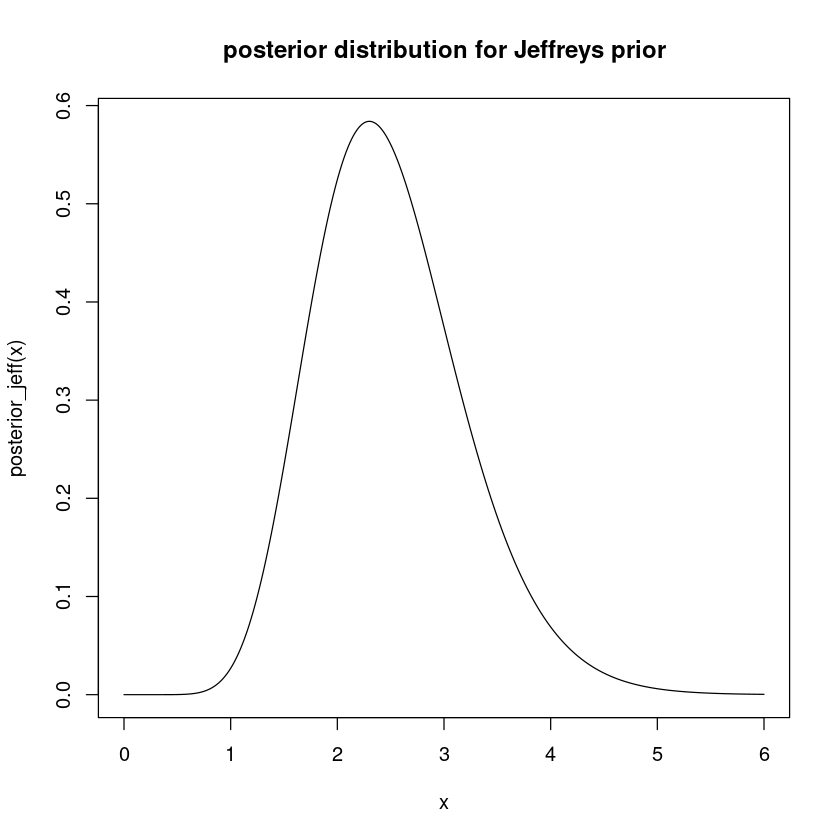

In [59]:
# when using a jeffreys prior, the posterior distribution results in a gamma function
alpha <- sum(data)+1/2; lambda <- length(data)
posterior_jeff <- function(mu){dgamma(mu,alpha,lambda)}
plot(x, posterior_jeff(x), type = 'l', main = 'posterior distribution for Jeffreys prior')

In [60]:
sampli <- rgamma(10000,alpha,1/lambda)
jeff_avg_emp <- mean(sampli)
#median
jeff_var_emp <- mean(sampli**2)-jeff_avg_emp**2
jeff_avg_theo <- alpha/lambda
jeff_var_theo <- alpha/lambda**2

### c) evaluate a 95% credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

In [61]:
find_ci <- function(post,c.i.,low,high){
    x <- seq(low,high,0.01)
    best_x <- x[which.max(post(x))]
    low_c <- max(0.5*best_x,low)#(low+best_x)/2
    high_c <- min(1.5*best_x,high)#(high+best_x)/2
    c <- integrate(post,low_c,high_c)$value
    i <- 0
    while(abs(c-c.i.) > 0.001){
        # The reference value is the best_x if the confidence is higher,
        # Otherwise, it is the bound a little displaced
        # Therefore, the interval extremes may go closer to best_x
        # if the confidence is higher than desired
        # and further from it otherwise
        ref_low <- max(low_c-(best_x-low_c)/10,low)*(c<c.i.)+best_x*(c>c.i.)
        ref_high <- min(high_c+(high_c-best_x)/10,high)*(c<c.i.)+best_x*(c>c.i.)
        #ref_high <- ifelse(ref_low ==low,high,best_x)
        
        # we randomly choose whether to modify both or a single one of the bounds
        # The most likely scenario (18/20) is that both extremes are moved.
        # It is equally likely that either of the bounds is the only one modified (1/20)
        modify <- sample(20,1)
        low_c <- (modify < 20)*(ref_low + low_c)/2+(modify == 20)*low_c
        high_c <- (modify > 1)*(ref_high + high_c)/2+(modify == 1)*high_c
        c <- integrate(post,low_c,high_c)$value
    }
    return(c(low_c,high_c,best_x))
}


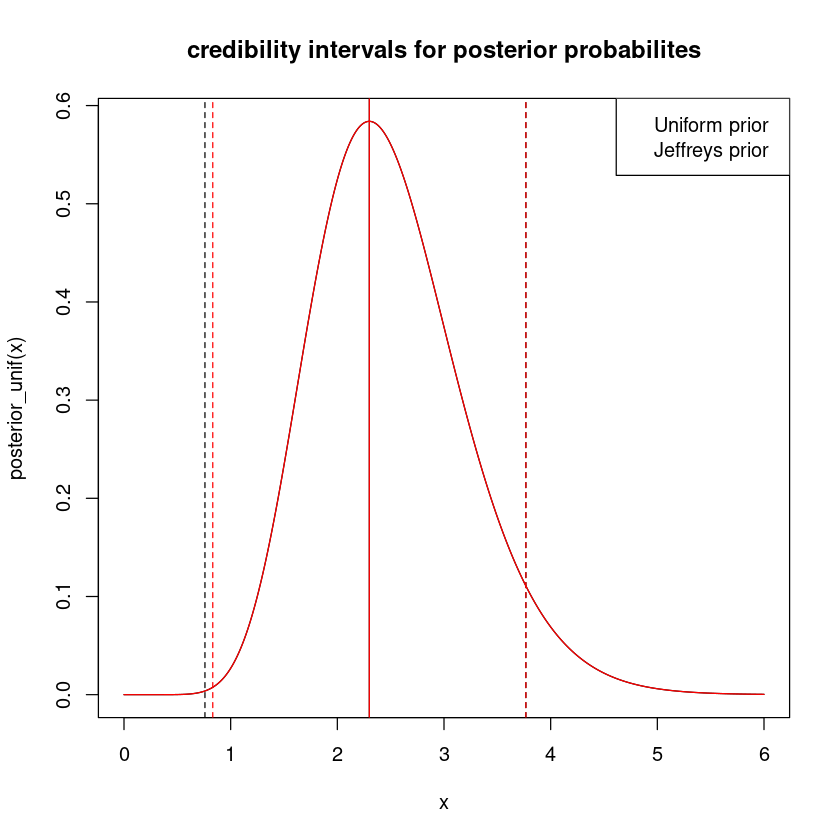

In [62]:
jeff_int <- find_ci(posterior_jeff,0.95,0,6)
unif_int <- find_ci(posterior_unif,0.95,0,6)
plot(x,posterior_unif(x), type = 'l', main = 'credibility intervals for posterior probabilites', col = 1)
abline(v=unif_int, lty = c(2,2,1), col = 1)
lines(x,posterior_jeff(x), type = 'l', col = 2)
abline(v=jeff_int,lty = c(2,2,1), col = 2)
legend("topright",legend = c("Uniform prior","Jeffreys prior"), col =1:2)

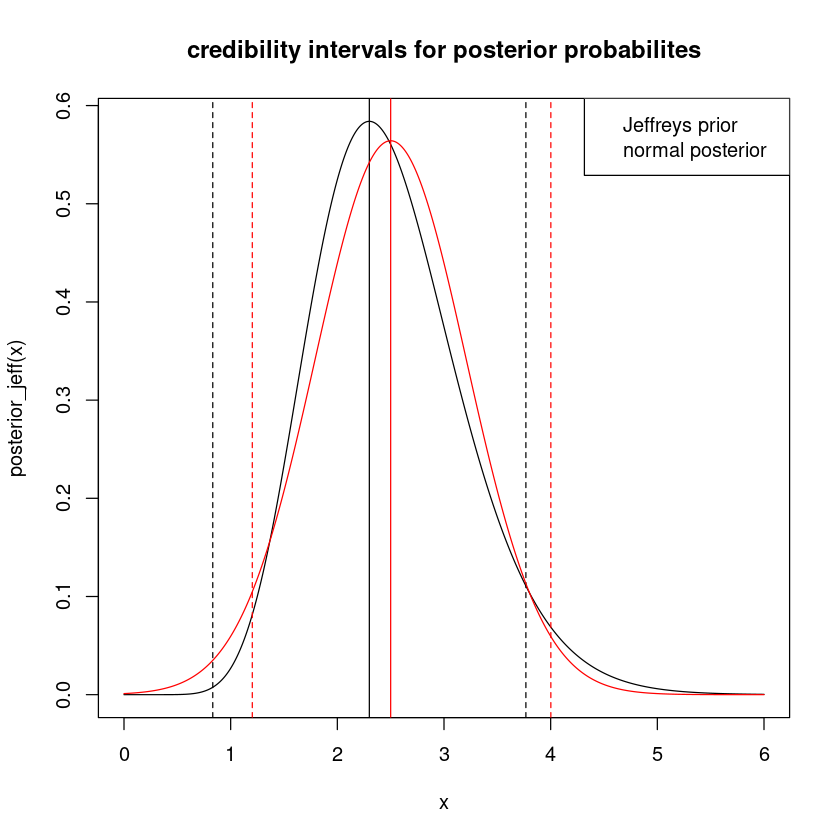

In [63]:
jeff_norm <- function(x){dnorm(x,jeff_avg_theo, sqrt(jeff_var_theo))}
jeff_norm_int <- find_ci(jeff_norm,0.95,0,6)
plot(x,posterior_jeff(x), type = 'l', main = 'credibility intervals for posterior probabilites', col = 1)
abline(v=jeff_int, lty = c(2,2,1), col = 1)
lines(x,jeff_norm(x), type = 'l', col = 2)
abline(v=jeff_norm_int,lty = c(2,2,1), col = 2)
legend("topright",legend = c("Jeffreys prior", "normal posterior"), col =1:2)

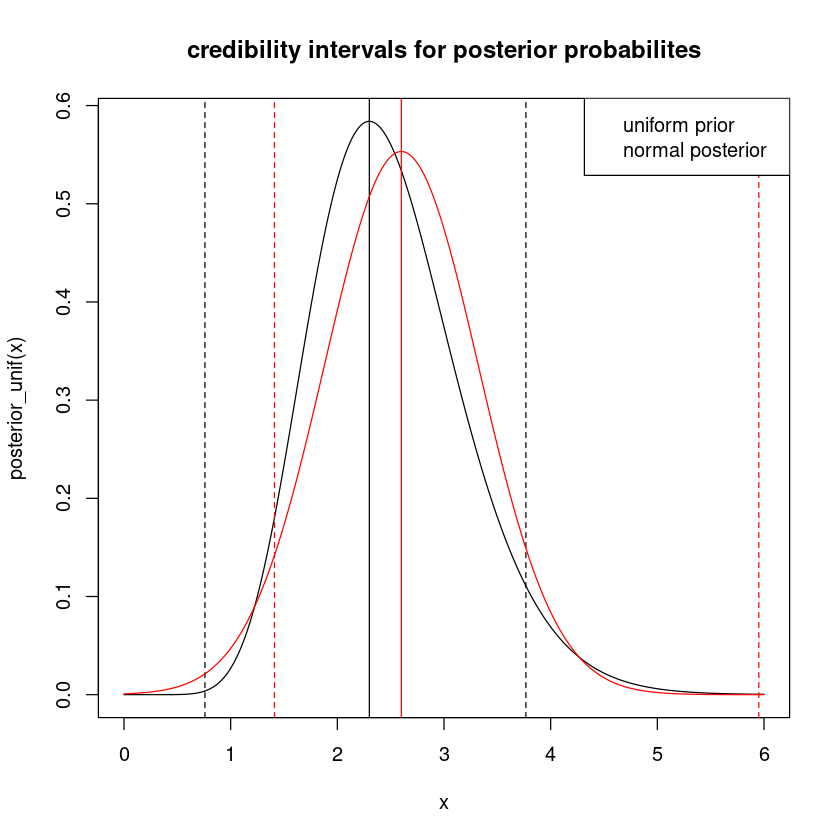

In [64]:
unif_norm <- function(x){dnorm(x,unif_avg_theo, sqrt(unif_var_theo))}
unif_norm_int <- find_ci(unif_norm,0.95,0,6)
plot(x,posterior_unif(x), type = 'l', main = 'credibility intervals for posterior probabilites', col = 1)
abline(v=unif_int, lty = c(2,2,1), col = 1)
lines(x,unif_norm(x), type = 'l', col = 2)
abline(v=unif_norm_int,lty = c(2,2,1), col = 2)
legend("topright",legend = c("uniform prior", "normal posterior"), col =1:2)

## Exercise 2
- Given the problem of the lightouse discussed last week, study the case in which both the position along the shore ($\alpha$) and the distance out at sea ($\beta$) are unknown

We want to study $p(\alpha,\beta|\{x_k\})$, which by Bayes' rule:
$$
\begin{align}
p(\alpha,\beta|\{x_k\}) &\propto p(\{x_k\}|\alpha,\beta)p(\alpha,\beta)\\
&\propto p(\{x_k\}|\alpha,\beta)p(\alpha)p(\beta)
\end{align}
$$
because $\alpha$ and $\beta$ are independent(?).

Furthermore, from a uniform distribution for the azimuth angle and some trigonometrical relations, we obtain:
$$
p(x_k|\alpha,\beta) = \frac{1}{\pi}\frac{\beta}{\beta^2+(x_k-\alpha)^2}
$$

Every observation is independent, thus:
$$
p(\alpha,\beta|\mathbf{x}) \propto p(\alpha)p(\beta)\prod_k\left(\frac{1}{\pi}\frac{\beta}{\beta^2+(x_k-\alpha)^2}\right)\\
\log p(\alpha,\beta|\mathbf{x}) \propto  \log C-\sum_k\log\left(\beta^2+(x_k-\alpha)^2\right)+N\log\beta\\
$$
where the priors were absorbed by the constant $C$, as we assumed uniform distributions for both parameters.


## Exercise 3
• Given the Signal over Background example discussed last week, analyze and discuss the following
cases:

### a ) vary the sampling resolution of used to generate the data, keeping the same sampling range xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
 - change the resolution $w = \{0.1, 0.25, 1, 2, 3\}$
 - Check the effect on the results

### b) change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)
 - Check the effect on the results